# Plot US Census maps using GeoPandas and Contextily.
---

## Download shape files (shp) from US Census

### Follow these steps.

#### 1) Go to https://www.census.gov/cgi-bin/geo/shapefiles/index.php
![png](Tiger_1.png)

#### 2) Under **"Select a layer type"** choose  **'States and Equivalent'**. Press `Submit`
![png](Tiger_2.png)

#### 3) Press `Download national file`
![png](Tiger_3.png)

#### 4) After downloading and unzipping the file your will see the following files under the **tl_2020_us_state** folder:
![png](Tiger_4.png)

#### 5) Copy the path for the file with `shp` extension, **tl_2020_us_state.shp**. We will read this file using GeoPandas.


### Load required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
import geopandas as gpd
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import warnings
warnings.simplefilter('ignore')

### Load US States shape file

Let's start by uploading the states 'shp' file and generate a simple plot of the US states

In [3]:
# Read shp file as a Geo Pandas Data Frame
path = "C:\\TuunicoDrive\\Python\\USCensus\\2020\\tl_2020_us_state\\tl_2020_us_state.shp"
df = gpd.read_file(path)

### Setting GeoPandas Projection
>The Coordinate Reference System (CRS) is important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates relate to places on the Earth.
Refer to:
[Link](https://geopandas.org/docs/user_guide/projections.html)

In [4]:
df = df.to_crs("EPSG:4326")

In [5]:
# Number of states in the file
len(df)

56

In [6]:
# Information for each state 
df.iloc[0,:]

REGION                                                      3
DIVISION                                                    5
STATEFP                                                    54
STATENS                                              01779805
GEOID                                                      54
STUSPS                                                     WV
NAME                                            West Virginia
LSAD                                                       00
MTFCC                                                   G4000
FUNCSTAT                                                    A
ALAND                                             62266296765
AWATER                                              489206049
INTPTLAT                                          +38.6472854
INTPTLON                                         -080.6183274
geometry    POLYGON ((-81.74725450543596 39.09537994722294...
Name: 0, dtype: object

Open **tl_2020_us_state.shp.ea.iso.xml** in Excel. It provides additional information on the variables included in the shp file.

---

**REGION**			Current Census region code\
**DIVISION**	Current Census division code\
**STATEFP**	Current state Federal Information Processing Series (FIPS) code\
**STATENS**	Current state GNIS code\
**GEOID**	State identifier; state FIPS code\
**STUSPS**	Current United States Postal Service state abbreviation\
**NAME**	Current state name\
**LSAD**	Current legal/statistical area description code for state\
**MTFCC**	MAF/TIGER feature class code\
**FUNCSTAT**	Current functional status\
**ALAND**	Current land area (square meters)\
**AWATER**	Current water area (square meters)\
**INTPTLAT**	Current latitude of the internal point\
**INTPTLON**	Current longitude of the internal point

The **geometry** field includes the polygon used by geopandas and other libraries to draw vectorized maps of each state.


#### Regions

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: center;">
      <th>REGION</th>
      <th>DESCRIPTION</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>Northeast</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Midwest</td>
    </tr>
    <tr>
      <td>3</td>
      <td>South</td>
    </tr>
    <tr>
      <td>4</td>
      <td>West</td>
    </tr>
    <tr>
      <td>9</td>
      <td>Puerto Rico and the Island Areas</td>
    </tr>  </tbody>
</table>

#### Divisions

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: center;">
      <th>DIVISION</th>
      <th>DESCRIPTION</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>Puerto Rico and the Island Areas</td>
    </tr>
    <tr>
      <td>1</td>
      <td>New England</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Middle Atlantic</td>
    </tr>
    <tr>
      <td>3</td>
      <td>East North Central</td>
    </tr>
    <tr>
      <td>4</td>
      <td>West North Central</td>
    </tr>
    <tr>
      <td>5</td>
      <td>South Atlantic</td>
    </tr>
    <tr>
      <td>6</td>
      <td>East Shoth Central</td>
    </tr>
    <tr>
      <td>7</td>
      <td>West Shoth Central</td>
    </tr>
    <tr>
      <td>8</td>
      <td>Mountain</td>
    </tr>
    <tr>
      <td>9</td>
      <td>Pacific</td>
    </tr>
</tbody>
</table>

<AxesSubplot:>

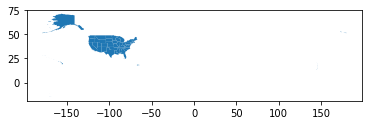

In [10]:
# Basic plot

df.plot()

#### **total_bounds** from geopandas generates an array of four elements that delimit the maps West, South, East, and North boundaries.

In [11]:
wsen = df.total_bounds

In [12]:
wsen

array([-179.231086  ,  -14.601813  ,  179.85968107,   71.439786  ])

### Create a new dataframe, **us49** for the continental US states

In [13]:
non_continental = ['HI','VI','MP','GU','AK','AS','PR']

In [14]:
non_continental

['HI', 'VI', 'MP', 'GU', 'AK', 'AS', 'PR']

In [15]:
# Exclude all non continental states

us49 = df

In [16]:
for n in non_continental:
    us49 = us49[us49.STUSPS != n]

In [17]:
len(us49)

49

#### Review the boundaries limits for US49.

In [18]:
wsen = us49.total_bounds

In [19]:
wsen

array([-124.848974,   24.396308,  -66.885444,   49.384479])

#### Plot only the boundaries of our geopandas data frame

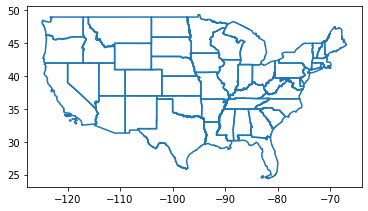

In [20]:
us49.boundary.plot()
plt.show()

#### Plot a simple map including the variable ALAND (current land area in square meters)

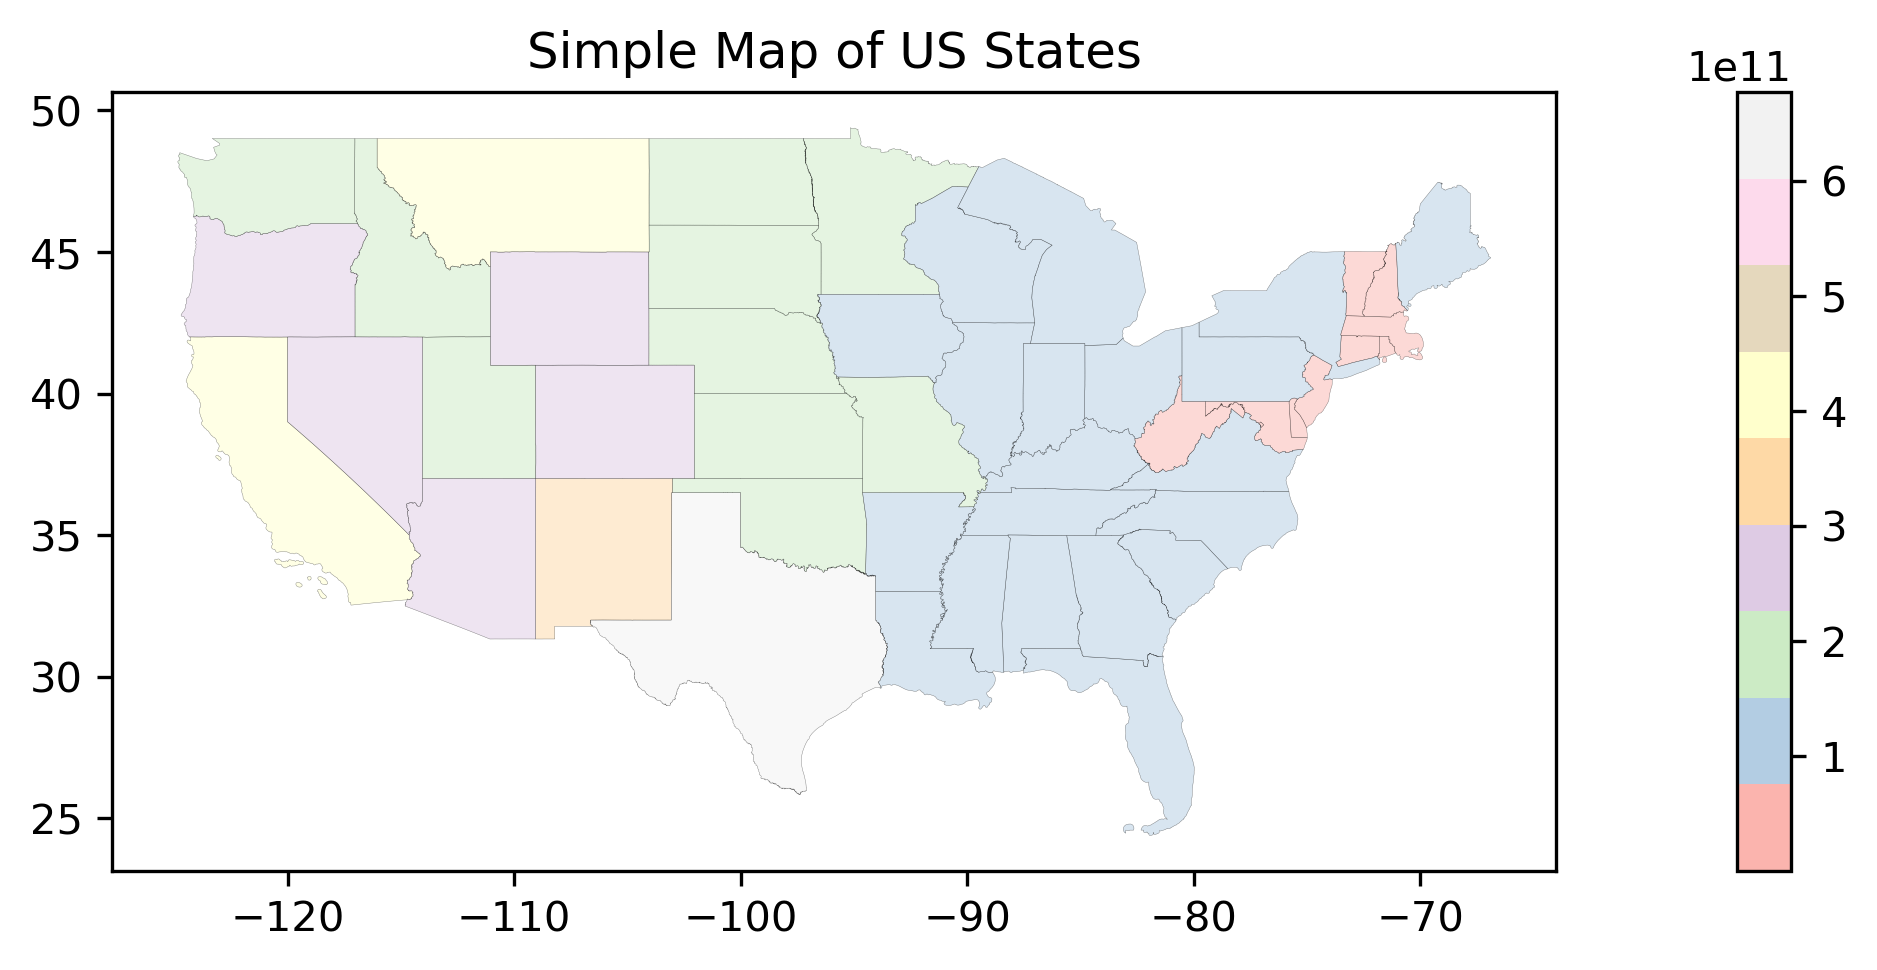

In [21]:
f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
#f.tight_layout()
plt.title('Simple Map of US States')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
us49.plot('ALAND', ax=ax, alpha=0.5, cmap='Pastel1', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
plt.show()

#### Create Plots for the diffent regions of the Continental US.

In [22]:
# Create a dictionary of the Regions in the Continental US
regions ={'1':'Northeast','2':'Midwest','3':'South','4':'West'}

In [23]:
regions

{'1': 'Northeast', '2': 'Midwest', '3': 'South', '4': 'West'}

In [24]:
type(regions)

dict

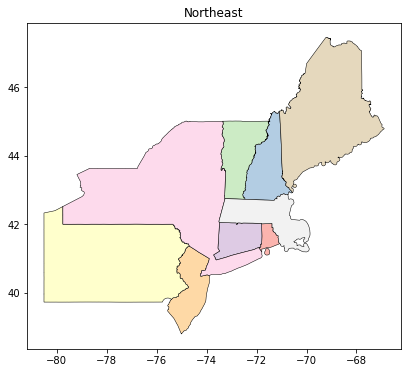

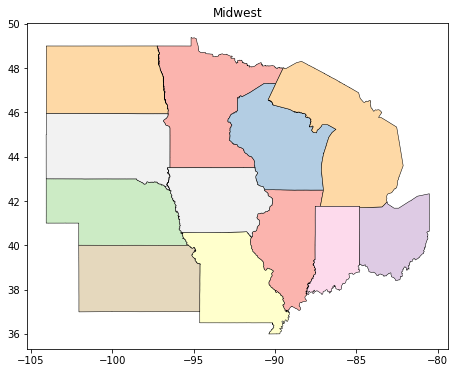

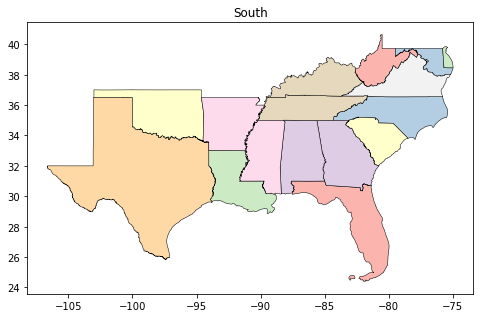

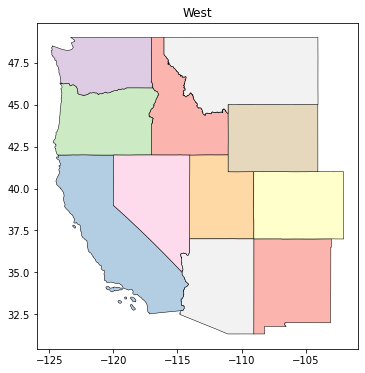

In [25]:
# Plot each Region separetly
for n in regions:
    us49.loc[df['REGION'] == n].plot(figsize=(8,6), cmap='Pastel1',edgecolor='k',linewidth=0.5)
    plt.title(regions[n])
    plt.show()

#### Create new columns in the us49 dataframe for land and water of each state in square miles 

[square mts to square miles](https://www.google.com/search?q=square+mts+to+square+miles&rlz=1C1VDKB_enUS936US936&oq=square+mts+to+square+miles&aqs=chrome..69i57j6.8391j0j9&sourceid=chrome&ie=UTF-8)

In [26]:
us49['ALAND_miles'] = us49['ALAND']*3.86102e-7
us49['AWATER_miles'] = us49['AWATER']*3.86102e-7

#### Calculate the **Centroid** of each state

> In mathematics and physics, the **centroid** or geometric center of a plane figure is the arithmetic mean position of all the points in the figure.\
Informally, it is the point at which a cutout of the shape could be perfectly balanced on the tip of a pin.

In [27]:
# Calculate the centroid
us49['centroid'] = us49.centroid

In [28]:
us49['centroid'].head()

0    POINT (-80.61371 38.64257)
1    POINT (-82.54411 28.42369)
2    POINT (-89.14863 40.12420)
3    POINT (-94.19832 46.34937)
4    POINT (-76.68717 38.94649)
Name: centroid, dtype: geometry

In [29]:
type(us49['centroid'])

geopandas.geoseries.GeoSeries

#### Plot centroids of each state

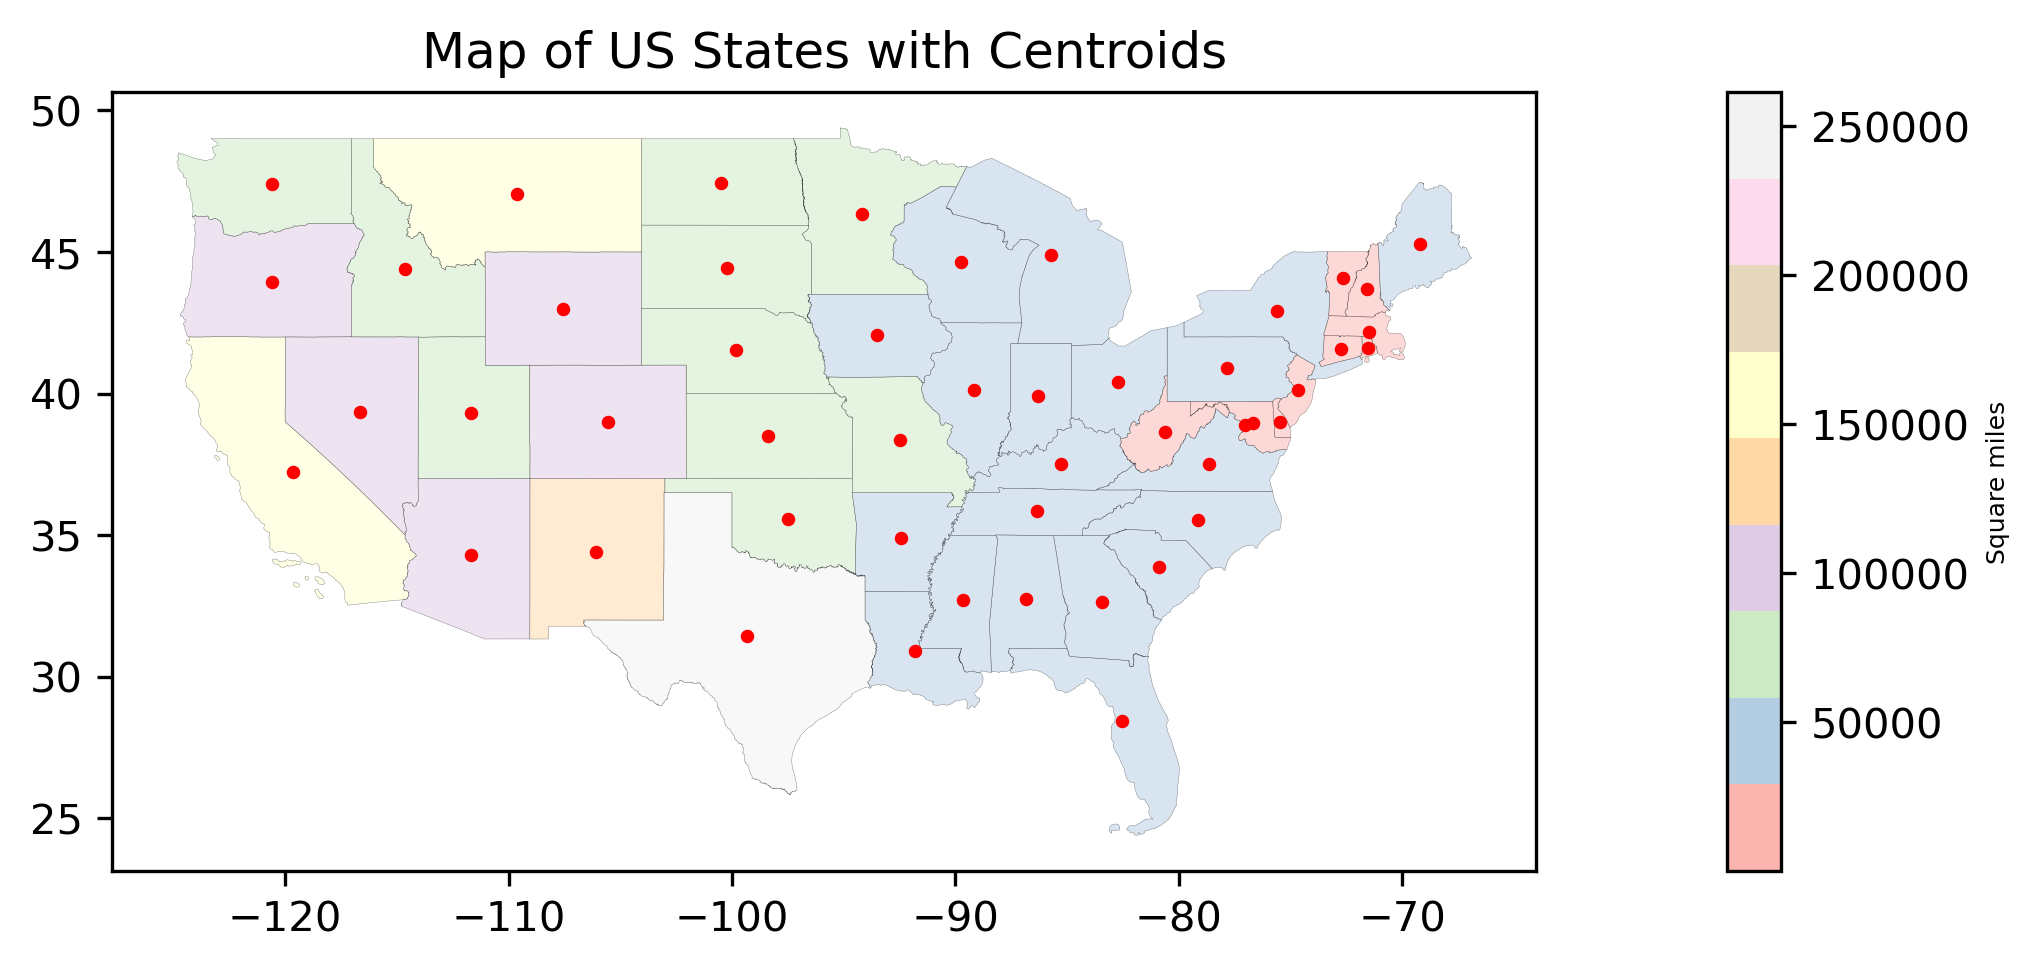

In [30]:
f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
#f.tight_layout()
plt.title('Map of US States with Centroids')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
us49.plot('ALAND_miles', ax=ax, alpha=0.5, cmap='Pastel1', edgecolor='k', legend=True, cax=cax, linewidth=0.1,label='Inline label')
plt.ylabel('Square miles', fontsize=6)
us49['centroid'].plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()

### Define a function to plot specific data from file

**df** = data frame to plot\
**data** = with the current file you can select either the ALAND (land area) or AWATER (water area)\
**cmap*** = define the colormaps to use in the matplot (i.e. summer, viridis.) for a selection of different cmaps refer to:\
[Link](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [31]:
def StatesPlot(df,data, cmap):
    f,ax = plt.subplots(1,1, figsize=(15,10), sharex=True, sharey=True, dpi=300)
    f.tight_layout()
    plt.title('United States Map - Variable = ' + data)
    ax.set_axis_off()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.5, alpha=0.5)
    df.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0.1)
    plt.ylabel('Square miles', fontsize=12)
    plt.show()

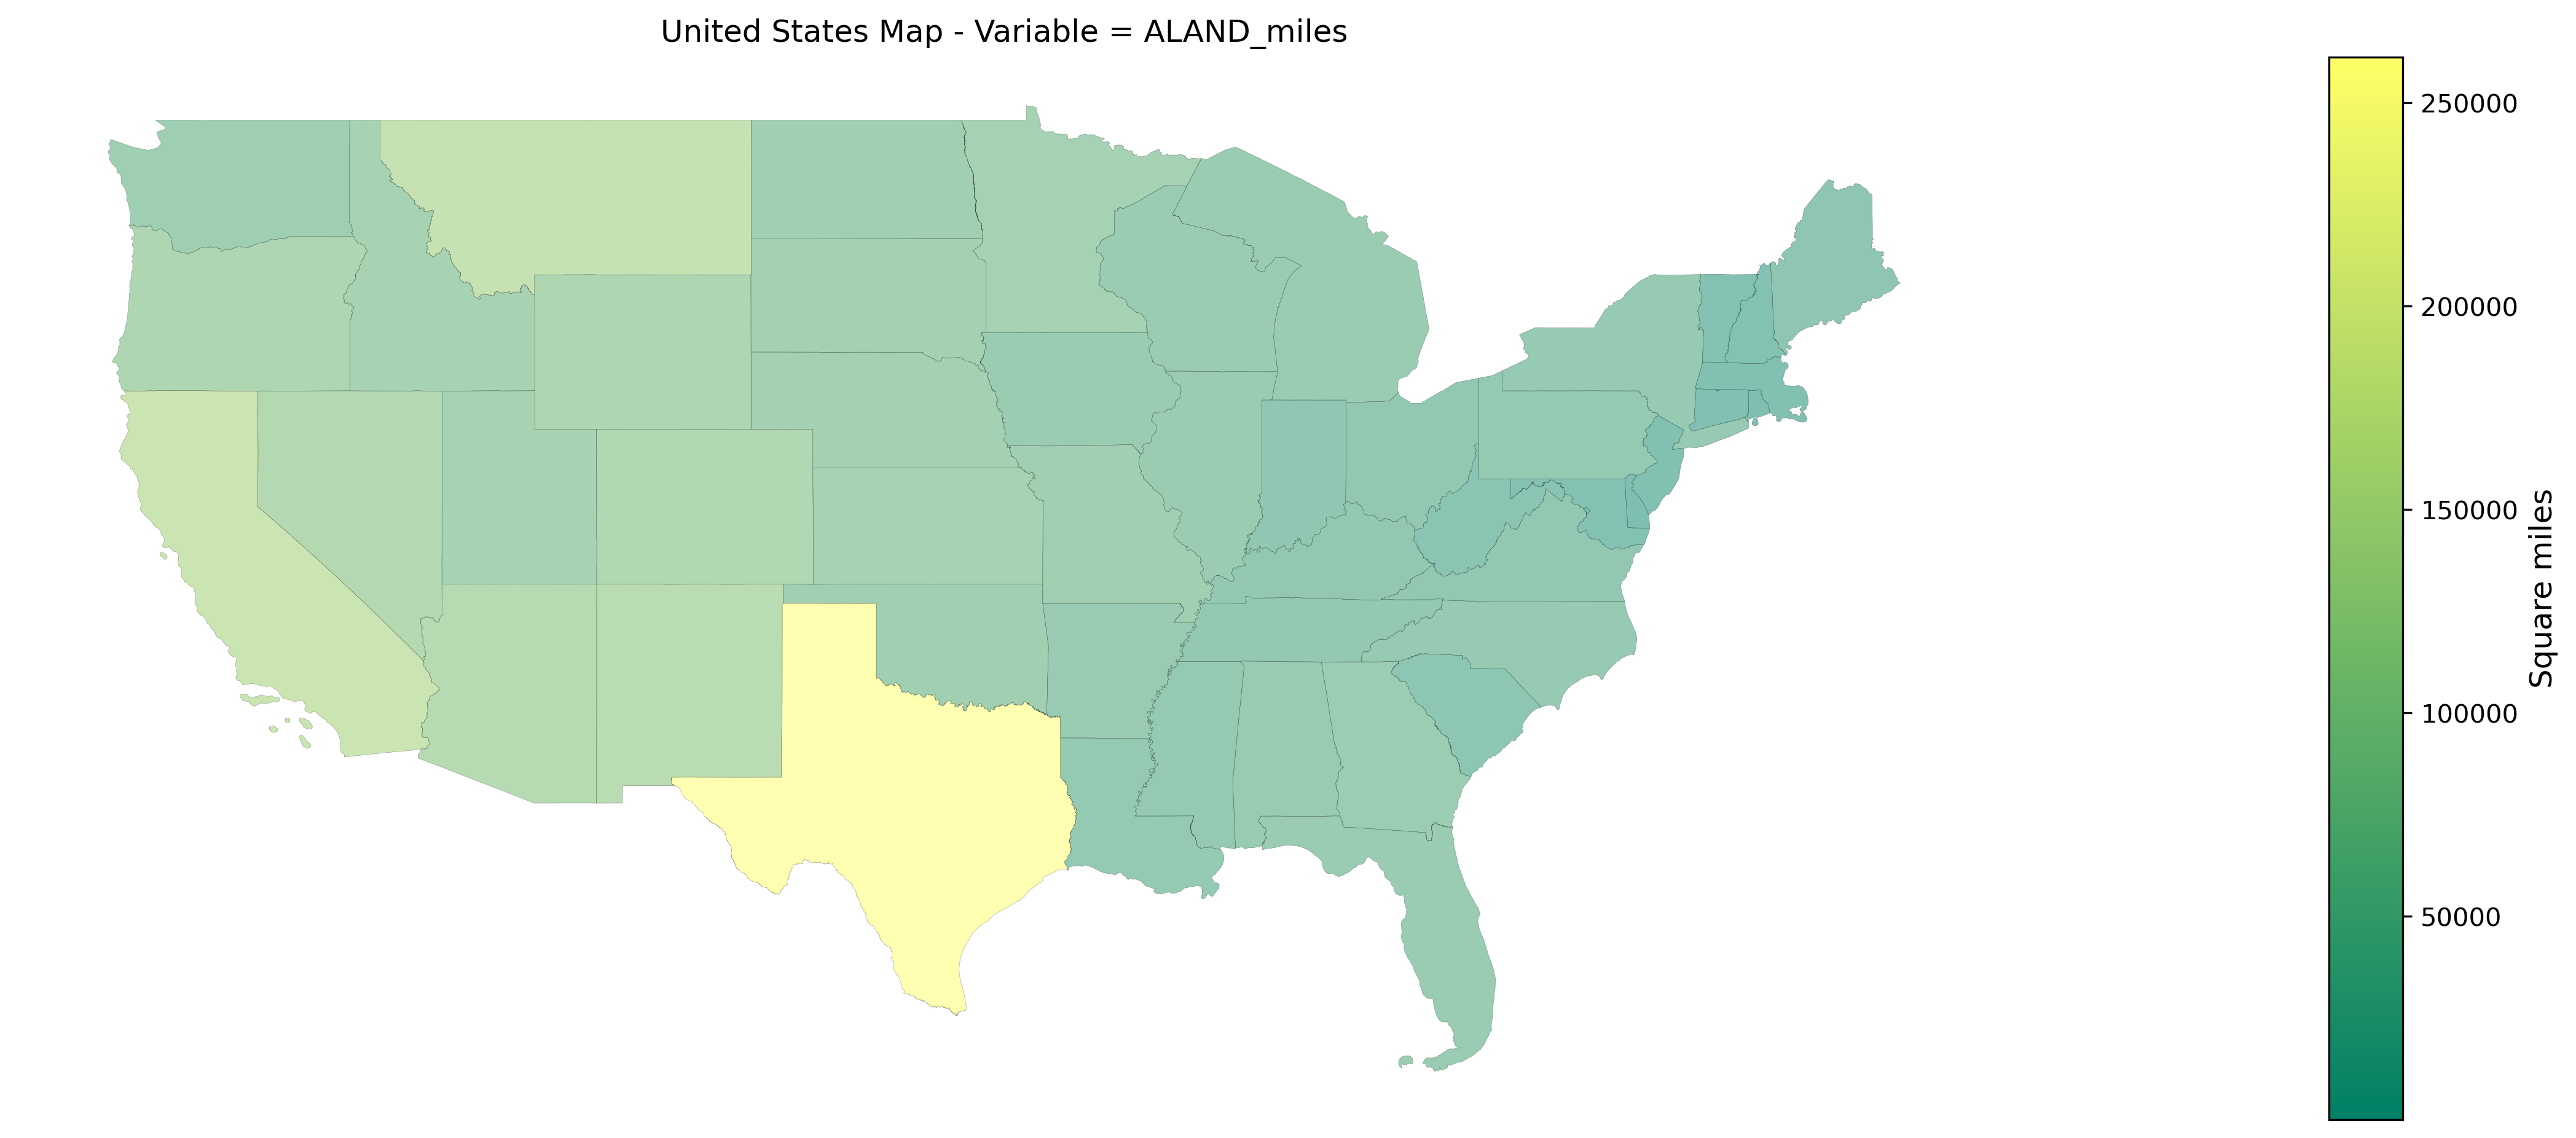

In [32]:
StatesPlot(us49,'ALAND_miles', 'summer')

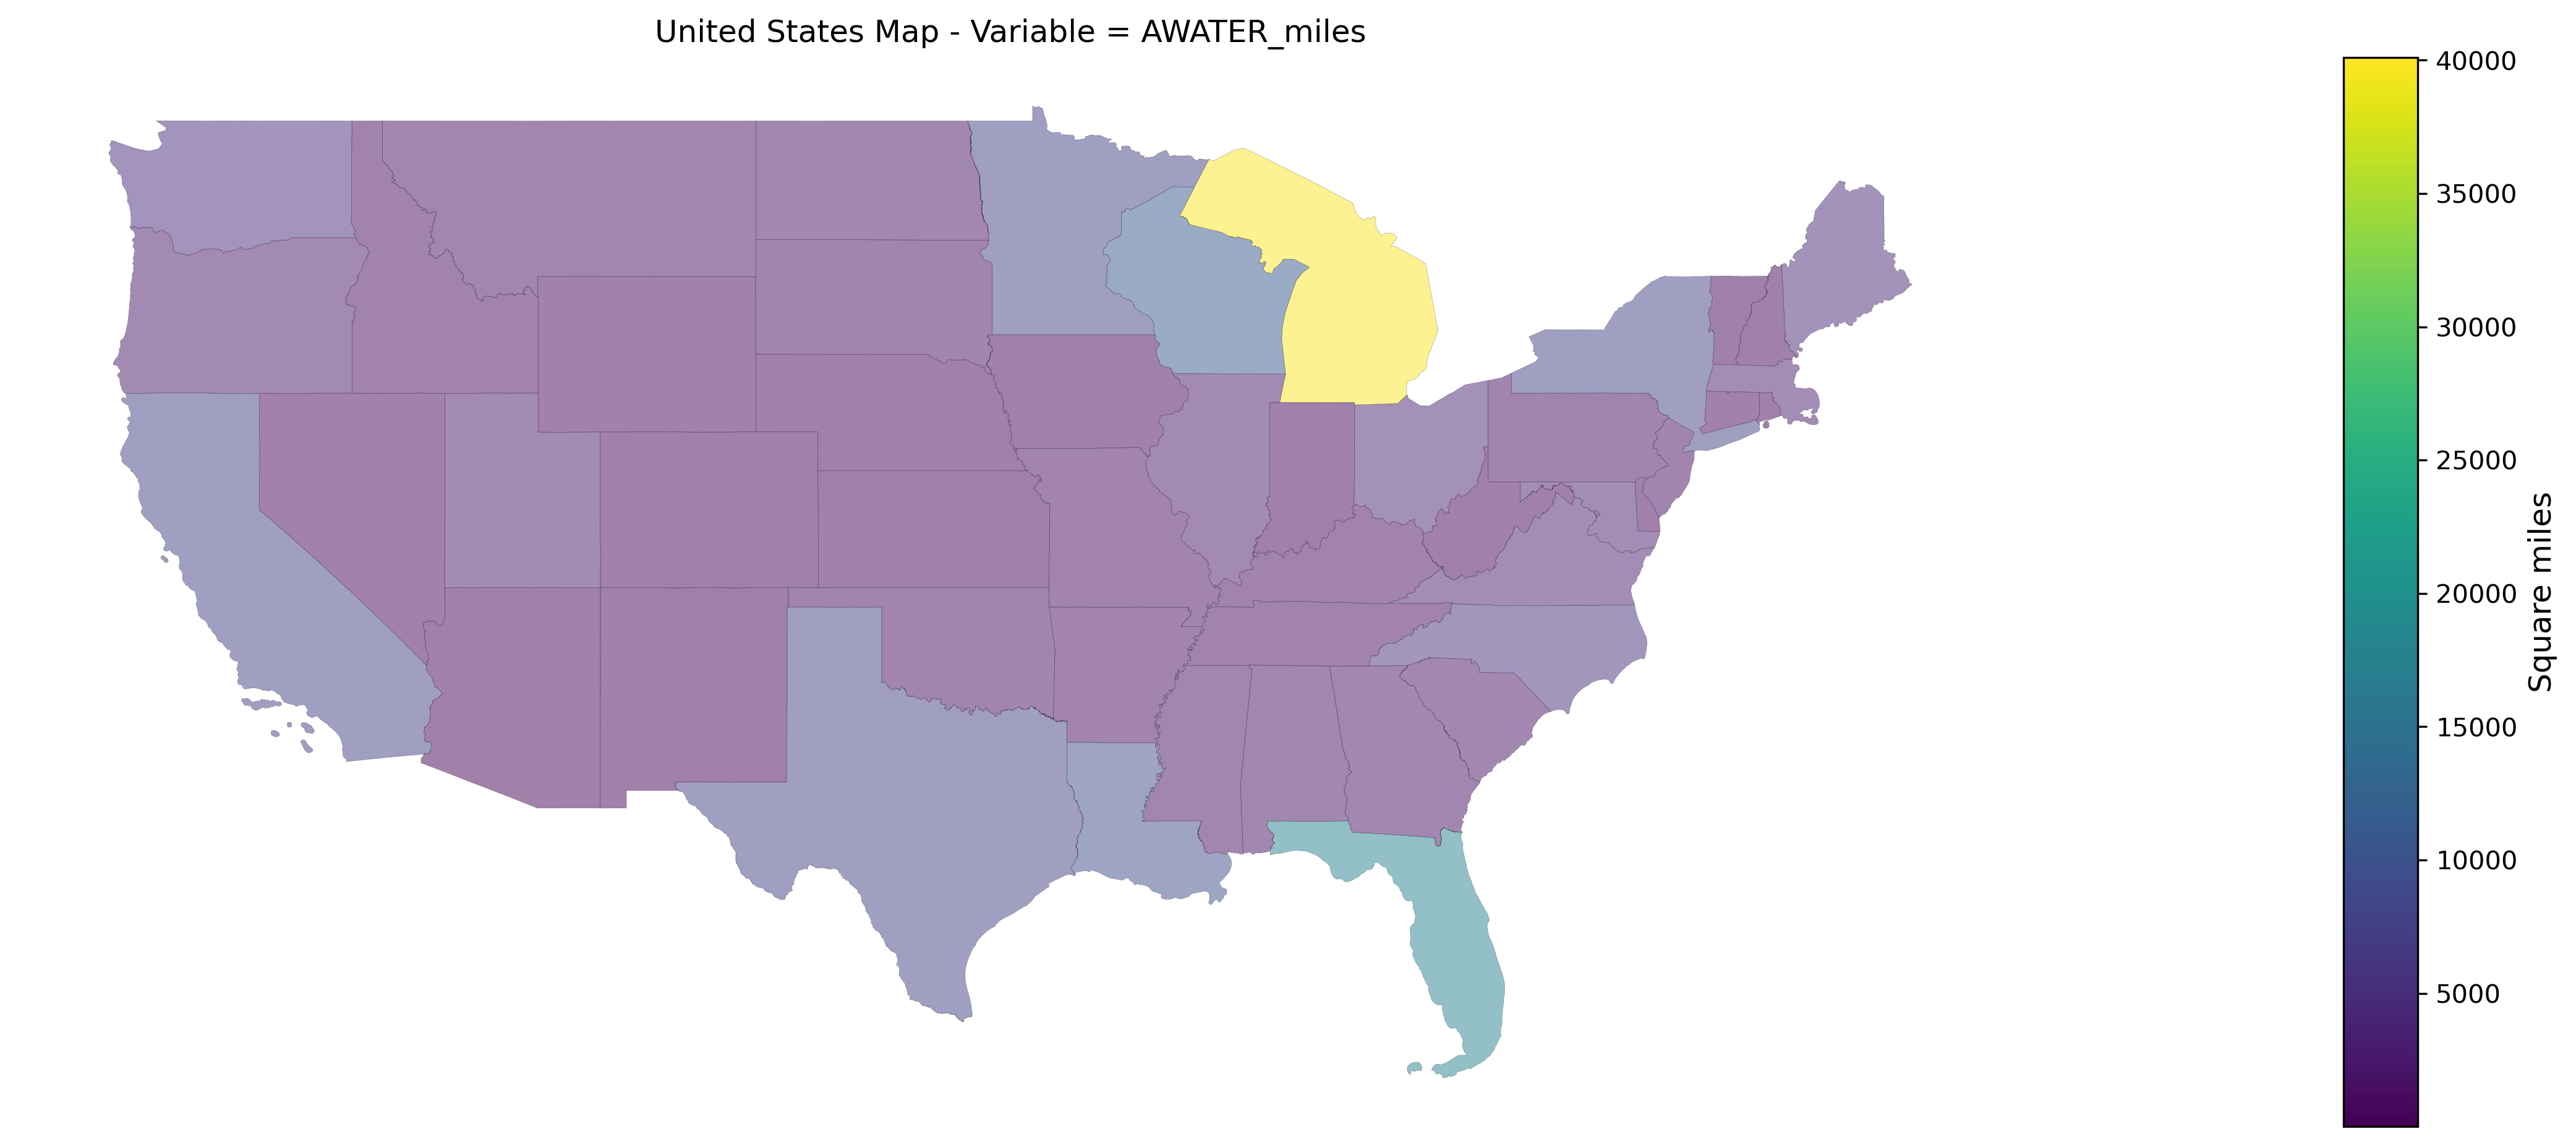

In [33]:
StatesPlot(us49,'AWATER_miles','viridis')

### US Map with contextily


> ### contextily: context geo tiles in Python
contextily retrieves tile maps from the internet. It can add those tiles as basemap to matplotlib figures or write tile maps to disk into geospatial raster files.
[Link](https://contextily.readthedocs.io/en/latest/index.html)


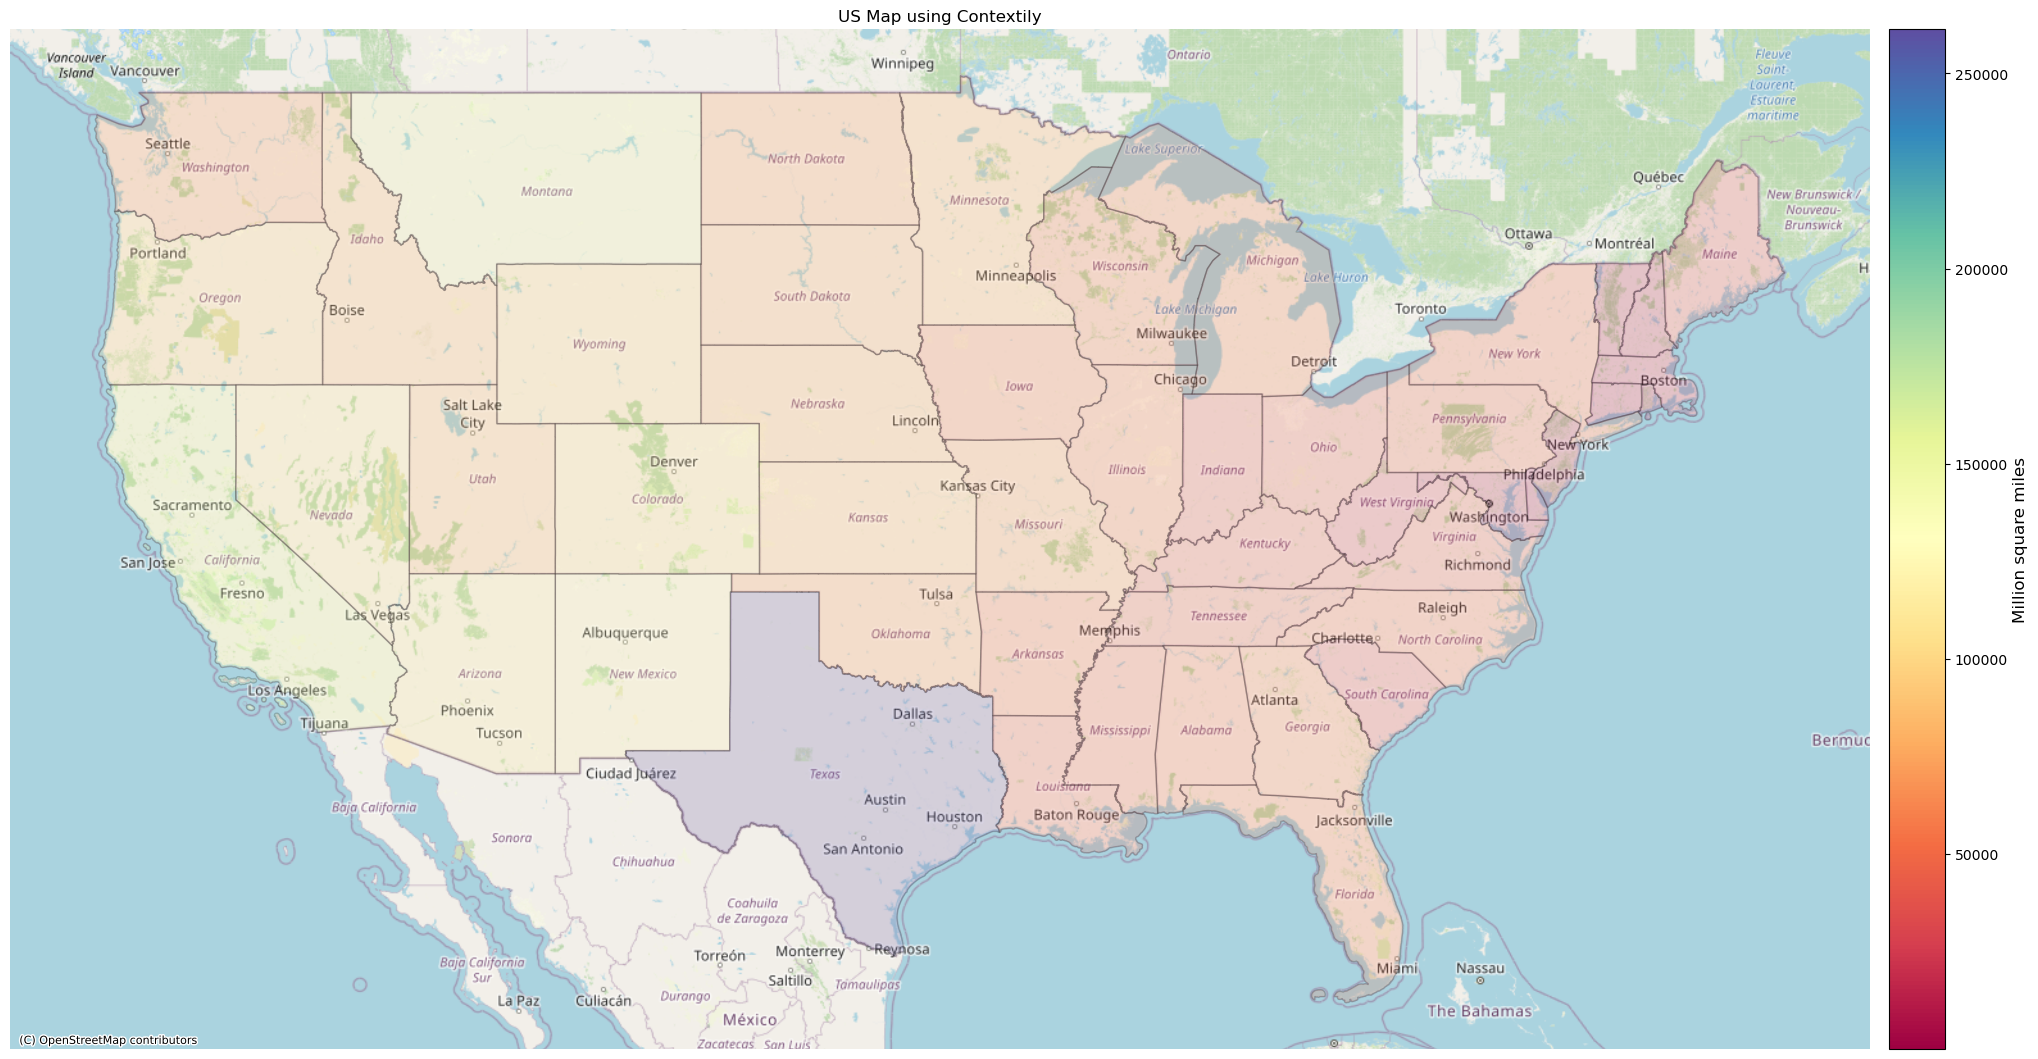

In [34]:
data='ALAND_miles'
cmap='Spectral'
zoom=5
dpi=100

#w,s,e,n = states.total_bounds

us49.crs = "EPSG:4326"

f,ax = plt.subplots(1,1, figsize=(20,12), sharex=True, sharey=True, dpi=dpi)
f.tight_layout(pad=0.8)
ax.set_axis_off()
plt.title('US Map using Contextily',fontsize='large')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
ux = us49.to_crs(epsg=3857).plot(data, ax=ax, edgecolor='k', cmap=cmap, alpha = 0.2, legend=True, cax=cax)
ctx.add_basemap(ux, zoom=zoom,source=ctx.providers.OpenStreetMap.Mapnik);
plt.ylabel('Million square miles', fontsize=12)
# Use savefig to save your map
plt.savefig('US Contextily Map with zoom = ' + str(zoom) +' .png')
plt.show()

#### List of maps titles providers available in contextily
[Link](https://contextily.readthedocs.io/en/latest/providers_deepdive.html)

In [35]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

### Plot one state with different resolutions


In [36]:
# list of states using STUSPS

us49['STUSPS'].unique()

array(['WV', 'FL', 'IL', 'MN', 'MD', 'RI', 'ID', 'NH', 'NC', 'VT', 'CT',
       'DE', 'NM', 'CA', 'NJ', 'WI', 'OR', 'NE', 'PA', 'WA', 'LA', 'GA',
       'AL', 'UT', 'OH', 'TX', 'CO', 'SC', 'OK', 'TN', 'WY', 'ND', 'KY',
       'ME', 'NY', 'NV', 'MI', 'AR', 'MS', 'MO', 'MT', 'KS', 'IN', 'SD',
       'MA', 'VA', 'DC', 'IA', 'AZ'], dtype=object)

In [37]:
def statePlot(st,data,cmap,zoom,dpi):
    state = us49.loc[us49['STUSPS'] == st]
    state.crs = "EPSG:4326"
    f,ax = plt.subplots(1,1, figsize=(8,8), sharex=True, sharey=True, dpi=dpi)
    f.tight_layout(pad=0.8)
    ax.set_axis_off()
    plt.title('Map using Contextily - ' + data,fontsize='large')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.2)
    ux = state.to_crs(epsg=3857).plot(data, ax=ax, edgecolor='blue', cmap=cmap, alpha = 0.2, legend=True, cax=cax)
    ctx.add_basemap(ux, zoom=zoom,source=ctx.providers.OpenStreetMap.Mapnik);
    plt.ylabel('Million square miles', fontsize=12)
    # Use savefig to save your map
    plt.savefig('US Contextily Map with zoom = ' + str(zoom) +' .png')
    plt.show()

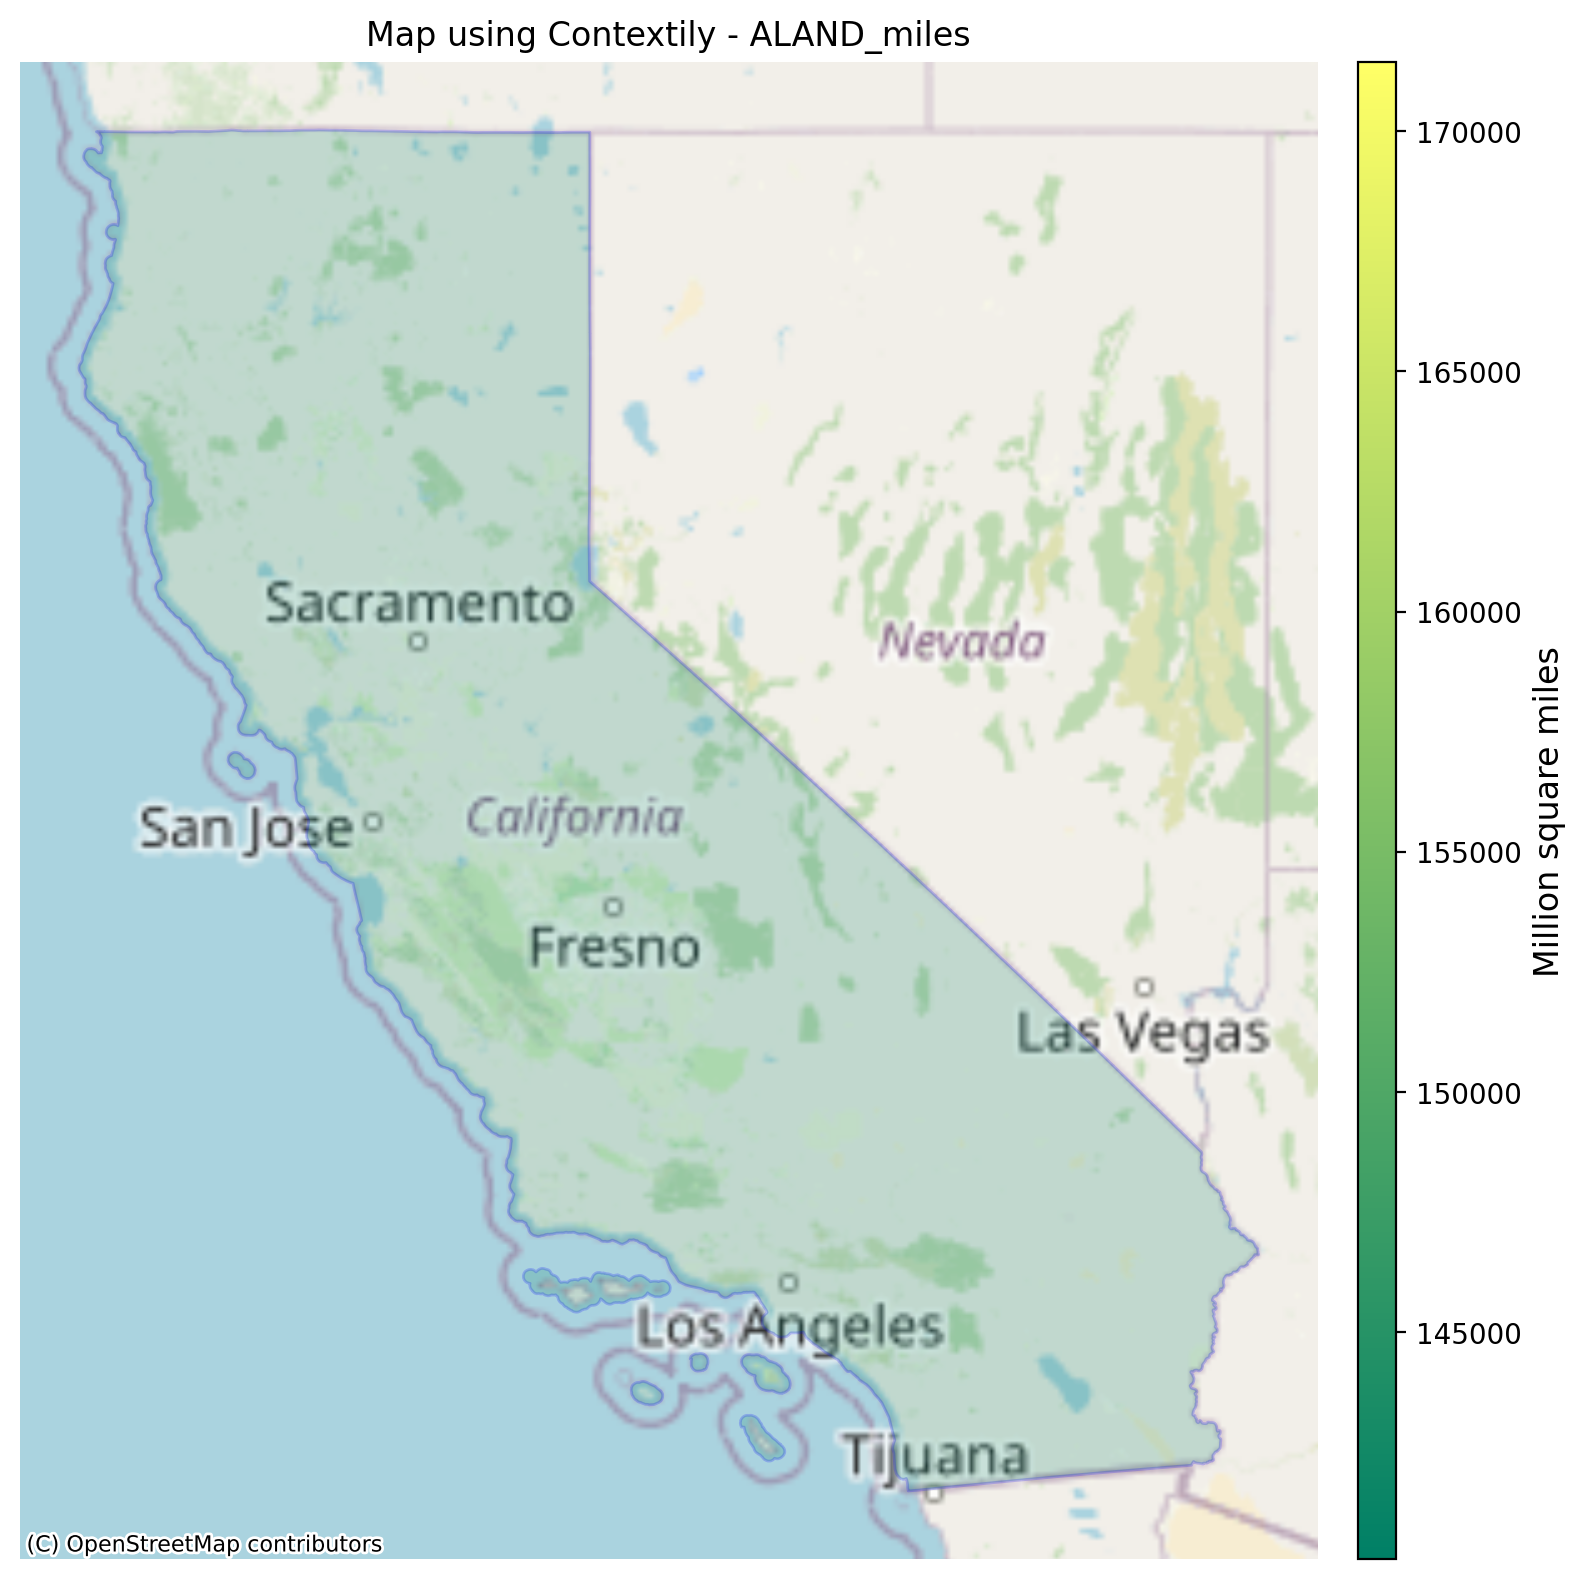

In [38]:
# Plot state with a zoom factor = 5
statePlot('CA','ALAND_miles','summer',5,200)

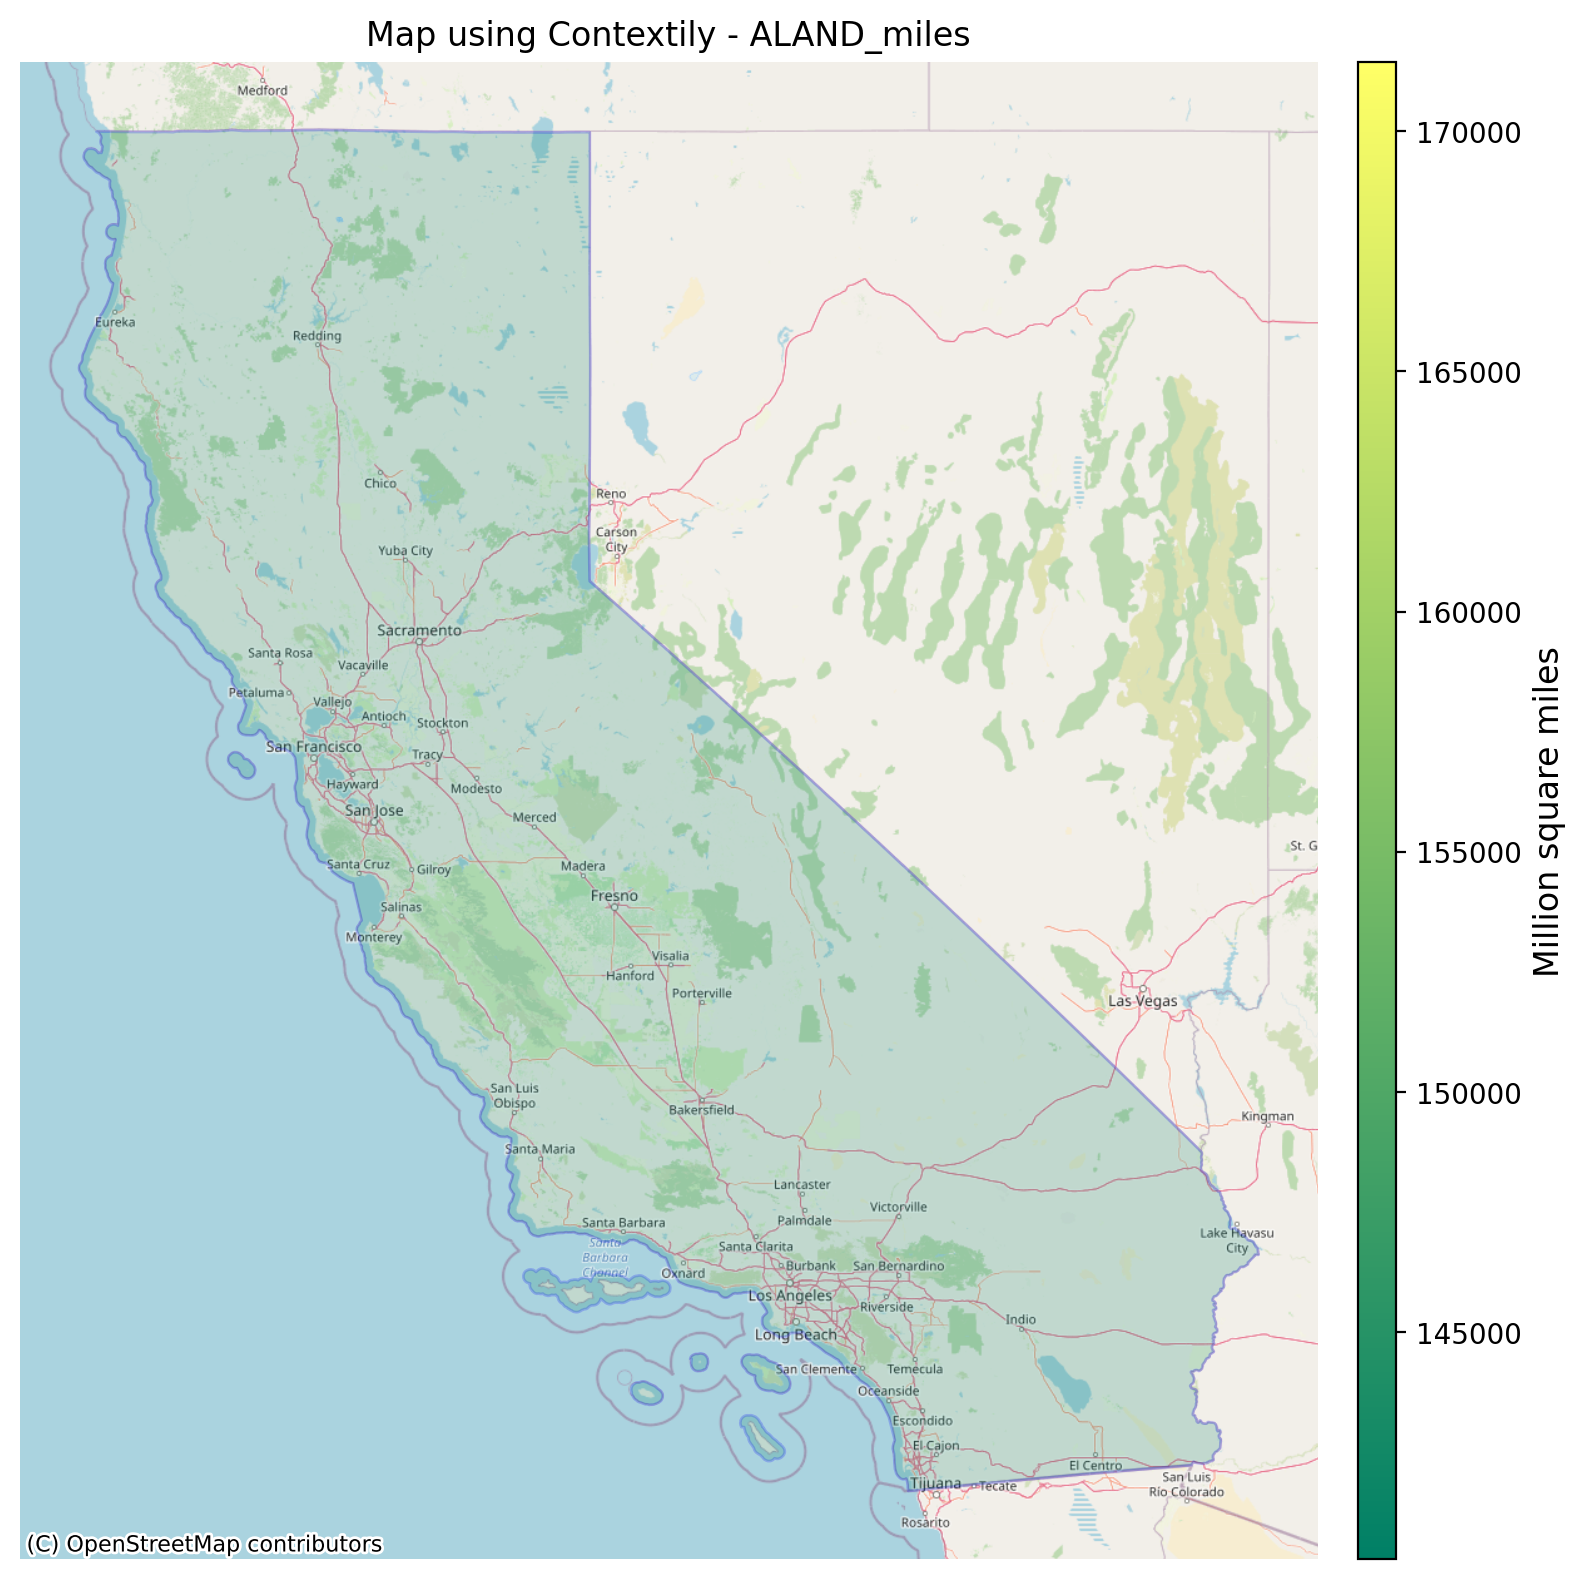

In [39]:
# Plot state with a zoom factor = 7
statePlot('CA','ALAND_miles','summer',7,200)

#### Plot state with a zoom factor = 9 and dpi = 300

>Allow sufficient time to generate the plot.


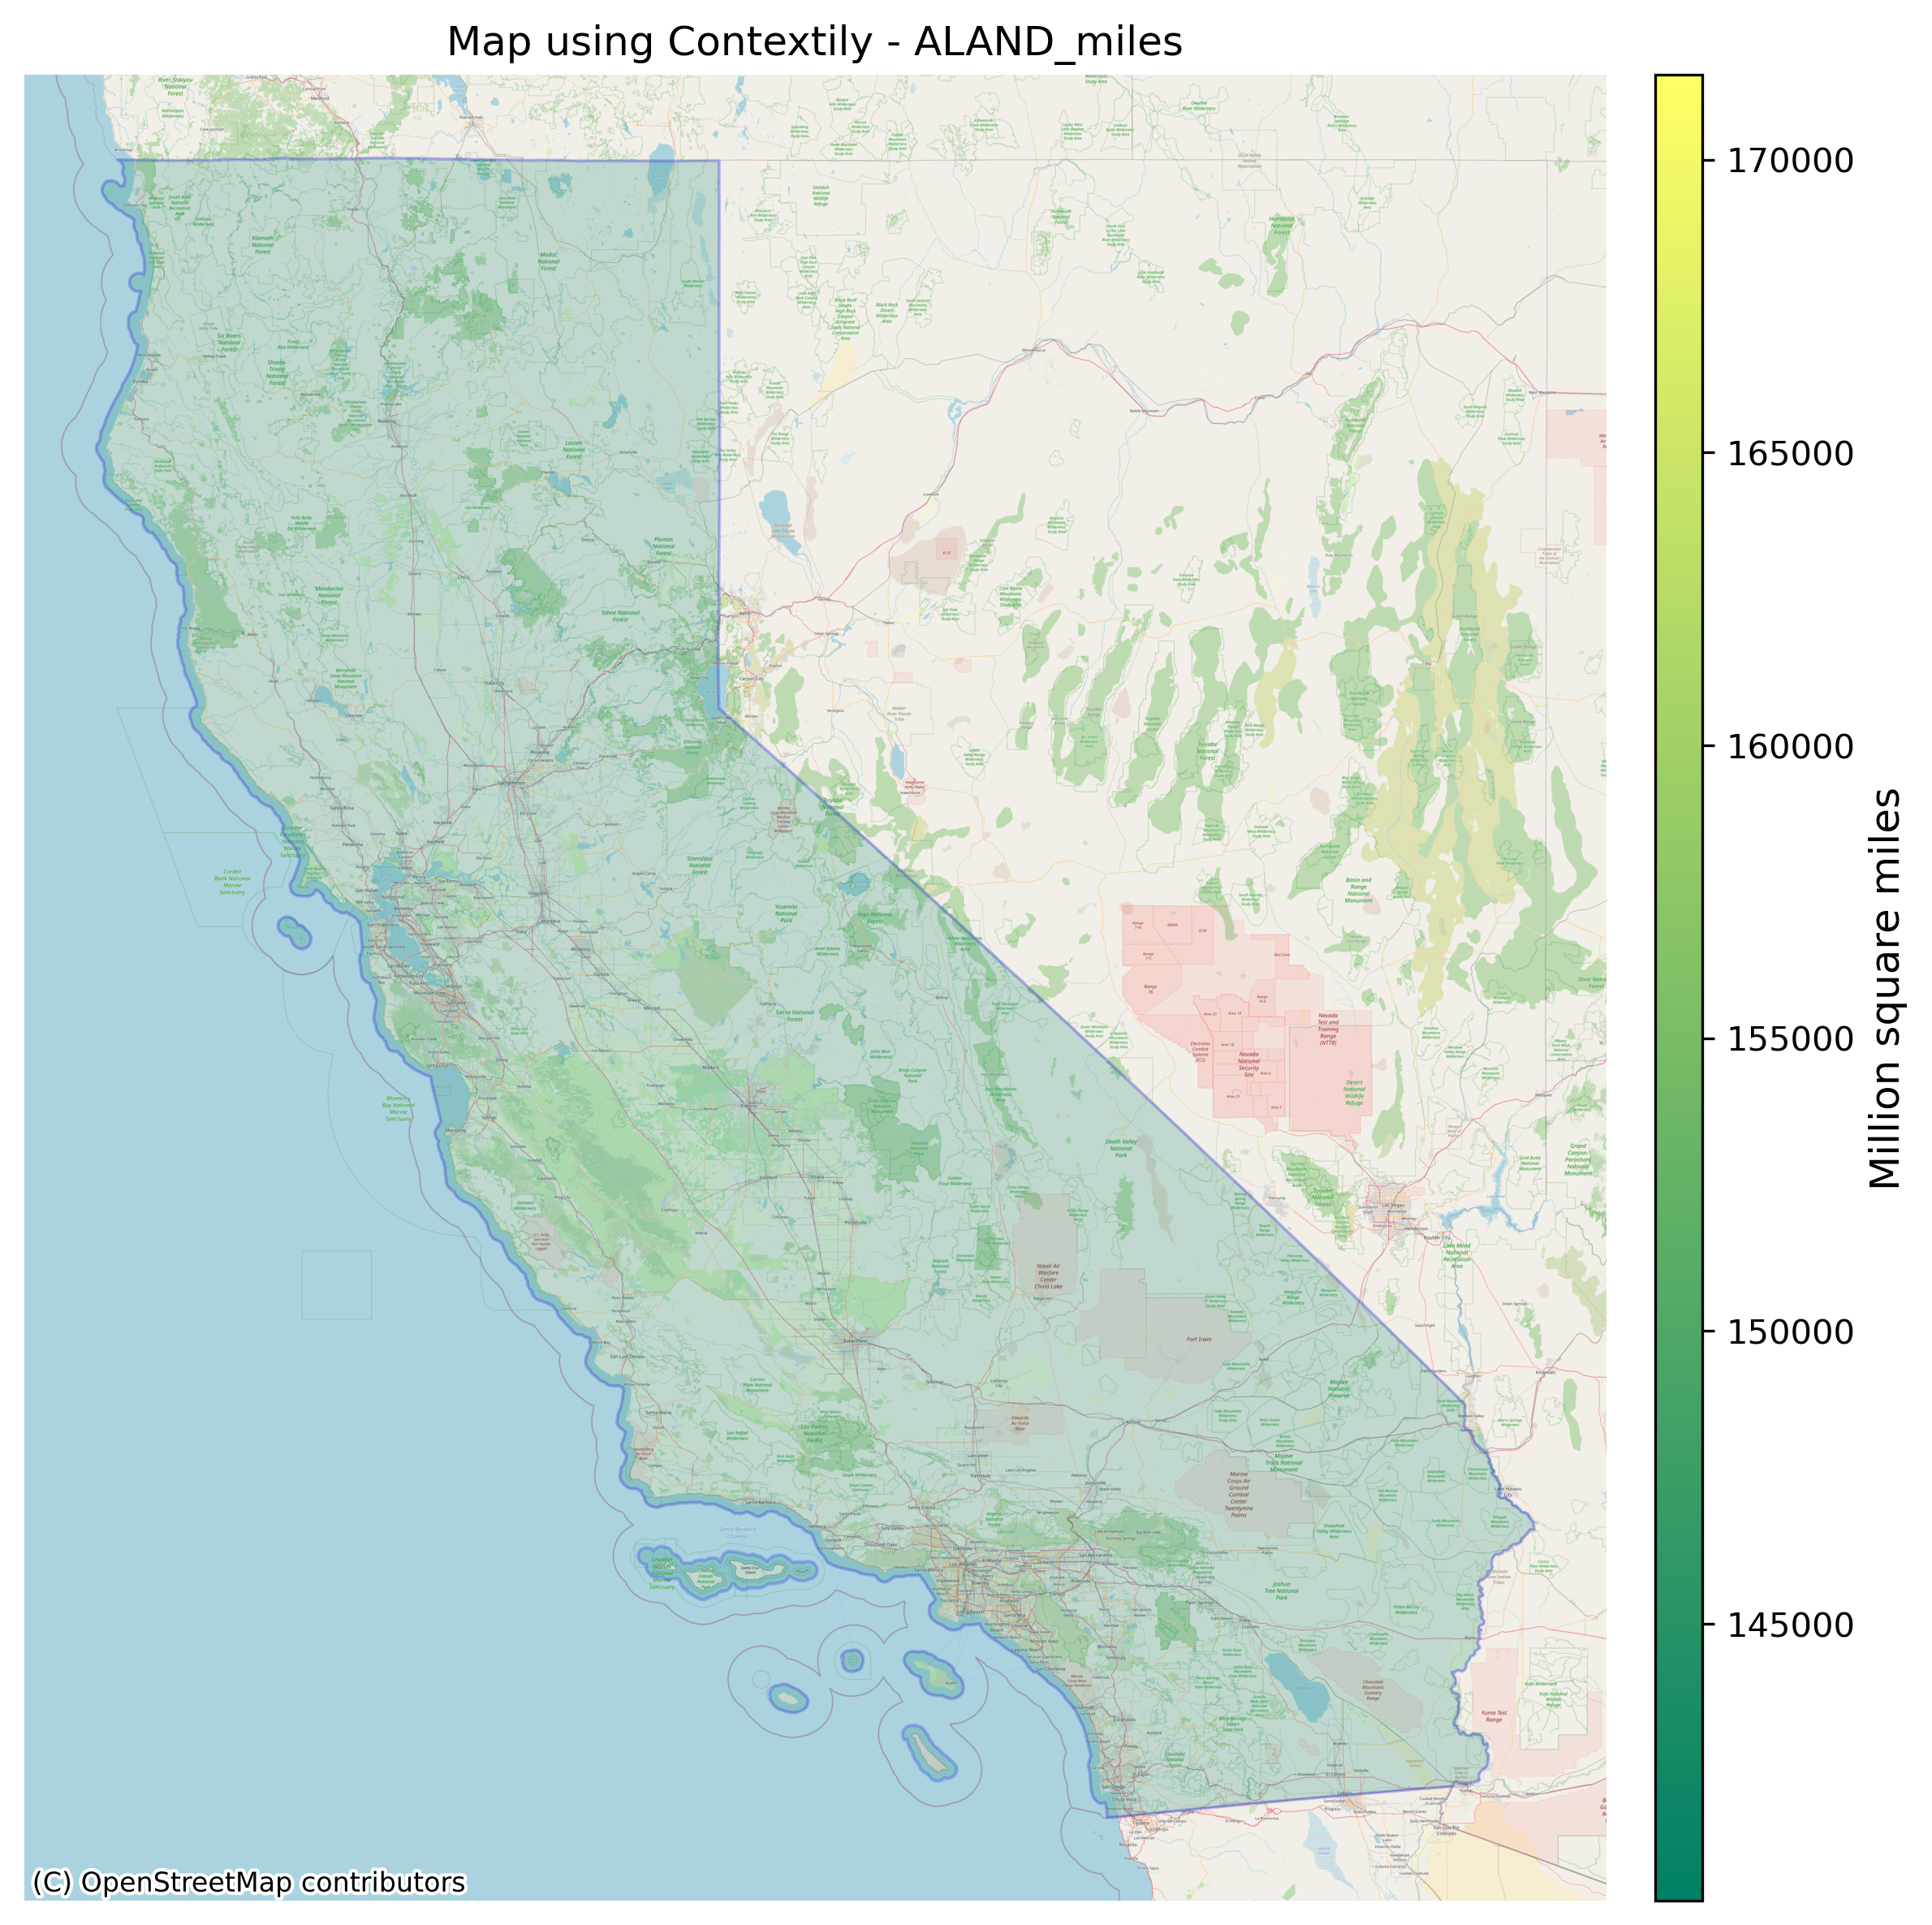

In [40]:
statePlot('CA','ALAND_miles','summer',9,300)